<a href="https://colab.research.google.com/github/ruan-narici/brazilian-ecommerce-analytics/blob/main/brazilian_ecommerce_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Projeto: Análise de Vendas e Entregas no E-commerce Brasileiro

### Imports

In [1]:
import pandas as pd

### Load datasets

In [2]:
df_customers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_customers_dataset.csv") #OK
# df_geolocation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_geolocation_dataset.csv") #EXCLUDE
df_order_items = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_items_dataset.csv") #OK
df_order_payments = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_payments_dataset.csv") #OK
df_order_reviews = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_order_reviews_dataset.csv") #OK
df_orders = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_orders_dataset.csv") #OK
df_products = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_products_dataset.csv") #OK
df_sellers = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/olist_sellers_dataset.csv") #OK
df_product_category_name_translation = pd.read_csv("/content/drive/MyDrive/Documentos/Dataset/Brazilian E-Commerce Public Dataset by Olist/product_category_name_translation.csv") #OK

### Define Types

In [3]:
# DateTimeType
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])
df_order_reviews["review_creation_date"] = pd.to_datetime(df_order_reviews["review_creation_date"])
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"])
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

### Merge datasets

In [4]:
df_merged = df_orders.merge(df_order_items, on="order_id")
df_merged = df_merged.merge(df_customers, on="customer_id")
df_merged = df_merged.merge(df_sellers, on="seller_id")
df_merged = df_merged.merge(df_products, on="product_id")
df_merged = df_merged.merge(df_order_payments, on="order_id")
df_merged = df_merged.merge(df_product_category_name_translation, on="product_category_name")
df_merged = df_merged.merge(df_order_reviews, on="order_id")

df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name_english', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

### Handling null values

In [5]:
# DateTimeType
# df_merged["order_approved_at"] = df_merged["order_approved_at"].fillna('1900-01-01')
# df_merged["order_delivered_carrier_date"] = df_merged["order_delivered_carrier_date"].fillna('1900-01-01')
# df_merged["order_delivered_customer_date"] = df_merged["order_delivered_customer_date"].fillna('1900-01-01')

# FloatType
df_merged["product_weight_g"] = df_merged["product_weight_g"].fillna('-2')
df_merged["product_length_cm"] = df_merged["product_length_cm"].fillna('-2')
df_merged["product_height_cm"] = df_merged["product_height_cm"].fillna('-2')
df_merged["product_width_cm"] = df_merged["product_width_cm"].fillna('-2')
df_merged["review_comment_message"] = df_merged["product_width_cm"].fillna('-2')

# StrType
df_merged["review_comment_title"] = df_merged["review_comment_title"].fillna('-2')


# DropNa
## If product does not have the filled fields: {order_approved_at, order_delivered_carrier_date, order_delivered_customer_date}, this product was not sales, then remove her
df_merged = df_merged.dropna()

df_merged.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


### Selecting and Creating some columns

In [6]:
# Selecting some Columns
df_analysis = df_merged[
    [
        "order_id",
        "seller_id",
        "customer_id",
        "order_purchase_timestamp",
        "order_approved_at",
        "shipping_limit_date",
        "order_estimated_delivery_date",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_status",
        "product_id",
        "seller_city",
        "seller_state",
        "customer_city",
        "customer_state",
        "product_category_name_english",
        "payment_type",
        "price",
        "freight_value",
        "payment_value",
        "review_score",
        "review_creation_date",
        "review_answer_timestamp",
        ]
    ].copy()


# Creating some columns
df_analysis["order_delivered_days"] = (df_analysis["order_delivered_customer_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_estimated_delivery_days"] = (df_analysis["order_estimated_delivery_date"] - df_analysis["order_delivered_carrier_date"]).dt.days
df_analysis["order_diff_estimated_delivery_days"] = (df_analysis["order_delivered_days"] - df_analysis["order_estimated_delivery_days"])

# Preview
df_analysis.sample(5)

,order_id,seller_id,customer_id,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,order_status,...,payment_type,price,freight_value,payment_value,review_score,review_creation_date,review_answer_timestamp,order_delivered_days,order_estimated_delivery_days,order_diff_estimated_delivery_days
102210,43cdace79982e3365d435048c203cde9,b74d1c09cb380e1d03a6f859c6f4224b,14b7979700eeefcb40f5b2f054fbee53,2018-03-11 11:40:39,2018-03-11 12:20:32,2018-03-15 12:20:32,2018-04-02,2018-03-12 21:50:42,2018-04-03 03:08:46,delivered,...,credit_card,49.99,15.05,65.04,5,2018-04-03,2018-04-05 23:03:05,21,20,1
106632,93843243cdd92e9fdfd9a1eb7429ddf1,ea8482cd71df3c1969d7b9473ff13abc,59b9edf2b330ded2efc5d1112b45a660,2018-01-03 17:29:21,2018-01-03 17:46:53,2018-01-09 17:46:53,2018-01-30,2018-01-08 19:18:59,2018-01-12 10:32:59,delivered,...,credit_card,24.99,15.10,79.18,1,2018-01-13,2018-01-13 14:21:46,3,21,-18
4829,f3de0893c636179ae92136f971523452,397c4d0c005b6f41f90098ac724e28cb,c622c9f760ecd07e8910f01da1a8efa8,2018-07-31 19:44:52,2018-08-01 20:10:17,2018-08-07 20:10:17,2018-08-09,2018-08-07 10:38:00,2018-08-10 00:21:54,delivered,...,credit_card,1799.00,42.11,1841.11,5,2018-08-11,2018-08-11 11:34:39,2,1,1
26498,cf8b06e3cb532f6045a05a87af095b50,c70c1b0d8ca86052f45a432a38b73958,bdf5201a85adc11a3881a5e1ffab102c,2018-04-20 16:17:12,2018-04-24 19:01:55,2018-04-26 16:31:06,2018-05-09,2018-04-23 22:41:41,2018-05-03 15:42:06,delivered,...,credit_card,95.00,15.55,110.55,5,2018-05-04,2018-05-06 22:32:20,9,15,-6
73893,c07afe1eb3c803b21074cff6735d7c26,2dee2ce60de9709b1a24083217181a1f,839f8b9d7d44081527d6f7ddc9465c6f,2017-10-02 22:52:10,2017-10-02 23:24:22,2017-10-08 23:24:22,2017-11-03,2017-10-03 21:23:01,2017-10-13 23:49:44,delivered,...,credit_card,143.00,38.55,181.55,3,2017-10-14,2017-10-15 12:17:06,10,30,-20


### Exploratory Analysis

**Top 7 of most sellers by seller state**

In [7]:
# Top 7 of most sellers by seller state
df_most_sellers_by_seller_state = df_analysis.groupby(["seller_state"]).agg({"payment_value": "sum", "seller_state": "count"}).rename(columns={"seller_state": "total_sales", "payment_value": "total_sale_value"}).sort_values(by="total_sales", ascending=False)
df_most_sellers_by_seller_state.head(7)

,total_sale_value,total_sales
seller_state,,
SP,12771107.02,80728
MG,1477541.91,8793
PR,1779514.54,8756
RJ,1049683.83,4779
SC,846727.31,4147
RS,545013.23,2195
DF,132436.25,920


**Top 7 of most purchases by customer state**

In [8]:
# Top 7 of most purchases by customer state
df_most_purchases_by_customer_state = df_analysis.groupby(["customer_state"]).agg({"payment_value": "sum", "customer_state": "count"}).rename(columns={"payment_value": "total_payment_value", "customer_state": "total_purchases"}).sort_values(by="total_purchases", ascending=False)
df_most_purchases_by_customer_state.head(7)

,total_payment_value,total_purchases
customer_state,,
SP,7319746.34,47812
RJ,2633042.81,14566
MG,2245371.75,13216
RS,1095143.79,6311
PR,1022798.67,5790
SC,751071.23,4143
BA,759188.41,3844


**Top 7 average of most expensive freight by customer state**

In [9]:
# Top 7 average of most expensive freight by customer state
df_avg_most_expensive_freight_by_customer = df_analysis.groupby(["customer_state"]).agg({"freight_value": "mean"}).rename(columns={"freight_value": "avg_freight_value"}).sort_values(by="avg_freight_value", ascending=False)
df_avg_most_expensive_freight_by_customer.head(7)

,avg_freight_value
customer_state,
RR,43.777500
PB,43.759851
RO,41.337883
AC,40.209022
TO,40.160334
PI,39.203013
MA,38.529071


**Top 7 average of most days to delivered by customer state**

In [10]:
# Top 7 average of most days to delivered by customer state
df_avg_most_days_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_days_to_delivery", ascending=False)
df_avg_most_days_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_review_score
customer_state,,,
RR,41.954545,24.090909,3.886364
AP,42.182927,24.048780,4.280488
AM,42.365269,23.191617,4.113772
AL,28.513699,20.356164,3.812785
PA,33.520833,19.593750,3.840909
SE,26.767016,17.327225,3.890052
MA,26.702602,17.302354,3.739777


**Top 7 average of most days diff estimated to delivered by customer state**

In [11]:
# Top 7 average of most days diff estimated to delivered by customer state
df_most_days_diff_estimated_to_delivered_by_customer_state = df_analysis.groupby("customer_state").agg({
    "order_estimated_delivery_days": "mean",
    "order_delivered_days": "mean",
    "order_diff_estimated_delivery_days": "mean",
    "review_score": "mean"
    }).rename(columns={
        "order_delivered_days": "avg_days_to_delivery",
        "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
        "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
        "review_score": "avg_review_score"
        }).sort_values(by="avg_order_diff_estimated_delivery_days", ascending=False)
df_most_days_diff_estimated_to_delivered_by_customer_state.head(7)

,avg_order_estimated_delivery_days,avg_days_to_delivery,avg_order_diff_estimated_delivery_days,avg_review_score
customer_state,,,,
AL,28.513699,20.356164,-8.157534,3.812785
MA,26.702602,17.302354,-9.400248,3.739777
SE,26.767016,17.327225,-9.439791,3.890052
ES,21.821429,11.630511,-10.190917,4.013228
BA,25.789022,15.328564,-10.460458,3.868106
MS,22.475508,11.844683,-10.630824,4.097969
SP,15.739166,5.068226,-10.670940,4.180394


**Top 7 best sales product categorias**

In [27]:
# Top 7 most sales product categories
df_best_sales_products_categories = df_analysis.groupby("product_category_name_english").agg({
        "product_id": "count",
        "price": "mean",
        "order_estimated_delivery_days": "mean",
        "order_delivered_days": "mean",
        "order_diff_estimated_delivery_days": "mean",
        "review_score": "mean"
        }).rename(columns={
            "product_id": "total_sales",
            "price": "avg_price",
            "order_estimated_delivery_days": "avg_order_estimated_delivery_days",
            "order_delivered_days": "avg_order_delivered_days",
            "order_diff_estimated_delivery_days": "avg_order_diff_estimated_delivery_days",
            "review_score": "avg_review_score",
            }).sort_values(by="total_sales", ascending=False)
df_best_sales_products_categories.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
bed_bath_table,11684,92.595886,20.275933,9.135313,-11.140620,3.915354
health_beauty,9749,129.969482,19.836188,8.437686,-11.398502,4.186276
sports_leisure,8734,113.299196,20.351385,8.852072,-11.499313,4.164071
furniture_decor,8554,87.254681,20.483633,8.557166,-11.926467,3.960019
computers_accessories,7926,116.386928,21.008579,9.066490,-11.942089,3.988897
housewares,7154,90.331698,19.177523,7.455130,-11.722393,4.116578
watches_gifts,6030,200.224776,20.650415,9.341294,-11.309121,4.069320


**Top 7 best product categories score**

In [28]:
# Top 7 most product score
df_best_product_categories_score = df_best_sales_products_categories.sort_values(by=["avg_review_score", "total_sales"], ascending=False)
df_best_product_categories_score.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
fashion_childrens_clothes,7,74.278571,21.714286,6.428571,-15.285714,5.000000
cds_dvds_musicals,14,52.142857,24.071429,7.571429,-16.500000,4.642857
books_imported,59,78.489153,15.491525,5.118644,-10.372881,4.525424
books_general_interest,544,85.147188,19.536765,8.126838,-11.409926,4.501838
small_appliances_home_oven_and_coffee,75,641.194133,17.613333,6.706667,-10.906667,4.453333
flowers,31,32.265806,19.193548,7.258065,-11.935484,4.419355
costruction_tools_tools,101,157.853465,20.613861,8.722772,-11.891089,4.415842


**Top 7 worst product categories score**

In [34]:
# Top 7 most product score
df_worst_product_categories_score = df_best_sales_products_categories.sort_values(by=["avg_review_score", "total_sales"], ascending=[True, False])
df_worst_product_categories_score.head(7)

,total_sales,avg_price,avg_order_estimated_delivery_days,avg_order_delivered_days,avg_order_diff_estimated_delivery_days,avg_review_score
product_category_name_english,,,,,,
security_and_services,2,141.645000,29.500000,13.000000,-16.500000,2.500000
diapers_and_hygiene,37,40.561892,16.972973,6.297297,-10.675676,3.378378
office_furniture,1748,158.737243,20.651030,9.651030,-11.000000,3.553204
home_comfort_2,28,26.231071,19.392857,11.821429,-7.571429,3.642857
fashion_male_clothing,137,80.957080,19.430657,7.678832,-11.751825,3.649635
fixed_telephony,259,214.183398,22.293436,8.320463,-13.972973,3.756757
audio,375,138.940480,19.450667,9.866667,-9.584000,3.845333


### Charts and Views [Matplotlib]

**Top 20 of most sellers by seller state**

<Axes: title={'center': 'Top 20 of most sellers by seller state'}, xlabel='seller_state'>

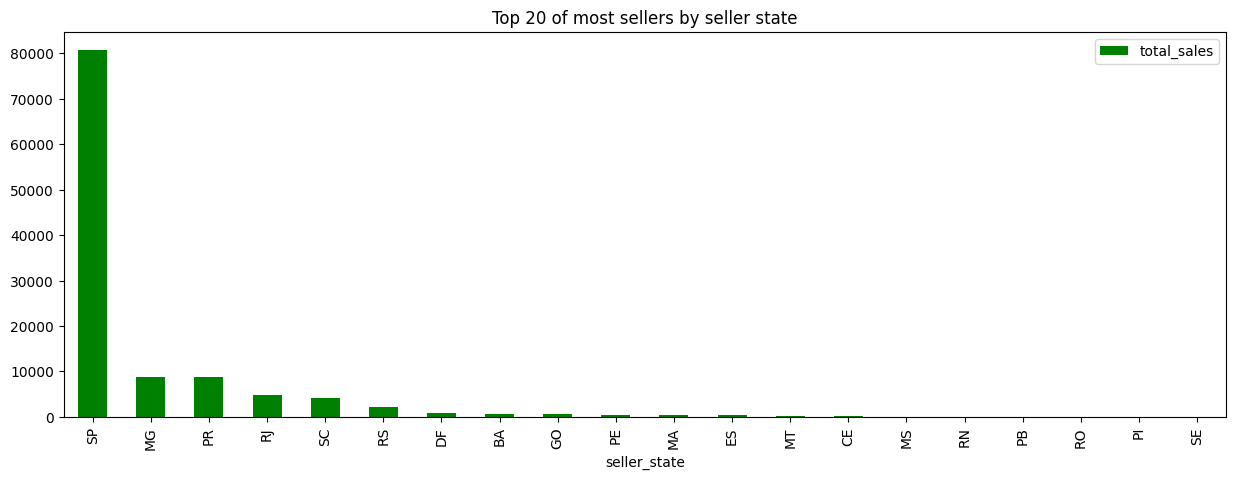

In [ ]:
df_most_sellers_by_seller_state.head(20).plot.bar(
    color=["green"],
    y=["total_sales"],
    title="Top 20 of most sellers by seller state",
    figsize=(15, 5)
    )

**Top 20 of most purchases by customer state**

<Axes: title={'center': 'Top 20 of most purchases by customer state'}, ylabel='customer_state'>

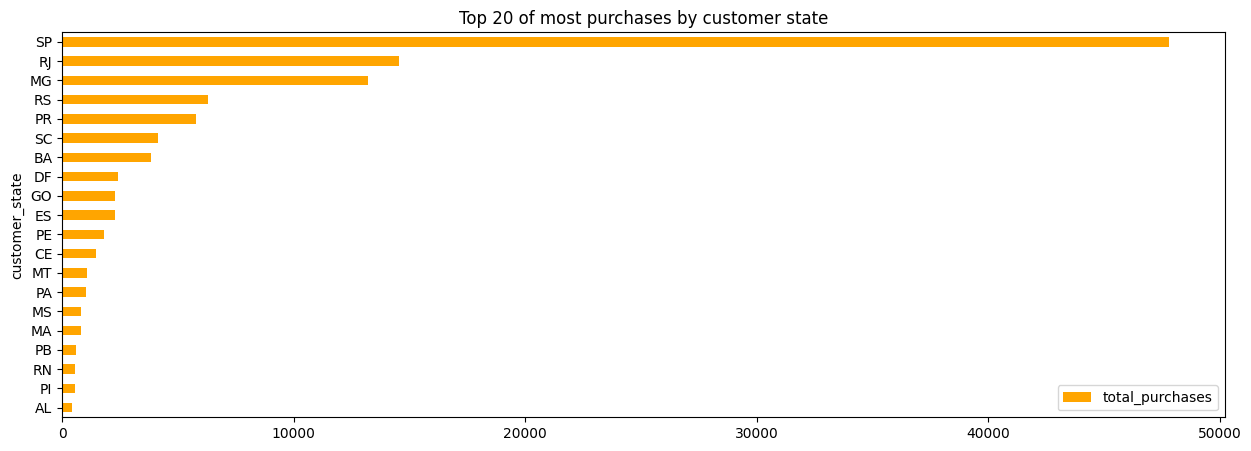

In [ ]:
df_most_purchases_by_customer_state.head(20).sort_values(by="total_purchases").plot.barh(
    color=["orange"],
    y=["total_purchases"],
    title="Top 20 of most purchases by customer state",
    figsize=(15, 5)
    )

Top 15 average of most expensive freight by customer state
**bold text**


<Axes: title={'center': 'Top 15 average of most expensive freight by customer state'}, xlabel='customer_state', ylabel='avg_freight_value'>

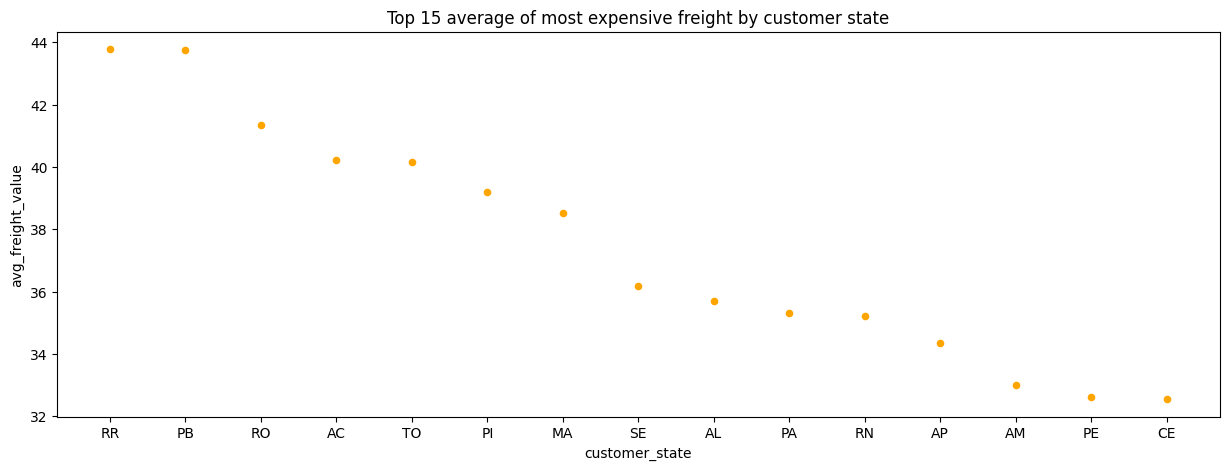

In [ ]:
df_avg_most_expensive_freight_by_customer.head(15).reset_index().plot.scatter(
    x="customer_state",
    y="avg_freight_value",
    color="orange",
    title="Top 15 average of most expensive freight by customer state",
    figsize=(15, 5)
    )

**Top 7 average of most days to delivered by customer state**

<Axes: title={'center': 'Top 7 average of most days to delivered by customer state'}, xlabel='customer_state'>

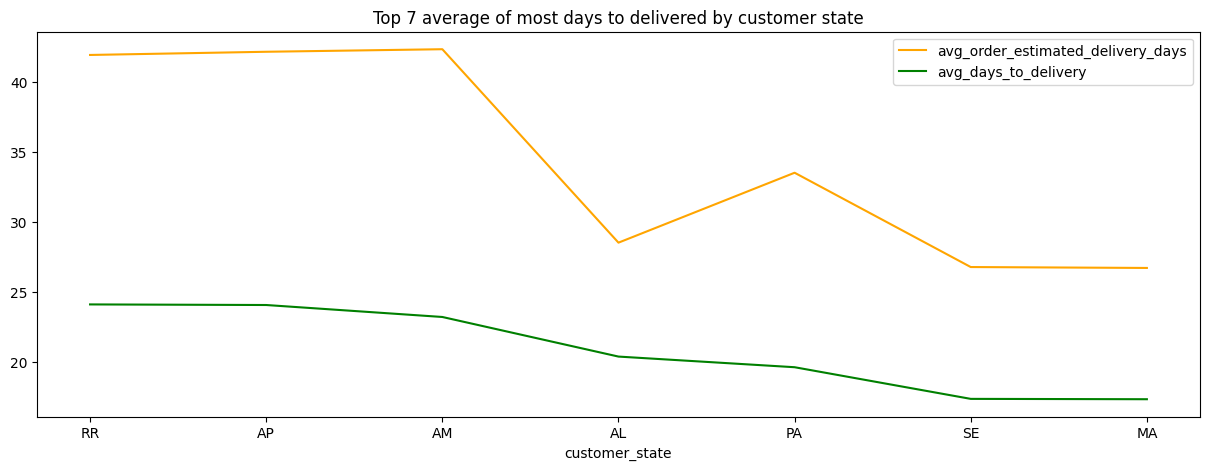

In [ ]:
df_avg_most_days_to_delivered_by_customer_state.head(7)[["avg_order_estimated_delivery_days", "avg_days_to_delivery"]].plot(
    color=["orange", "green"],
    title="Top 7 average of most days to delivered by customer state",
    figsize=(15, 5)
    )

**Top 20 average of most days diff estimated to delivered by customer state**

<Axes: title={'center': 'Top 20 average of most days diff estimated to delivered by customer state'}, xlabel='customer_state'>

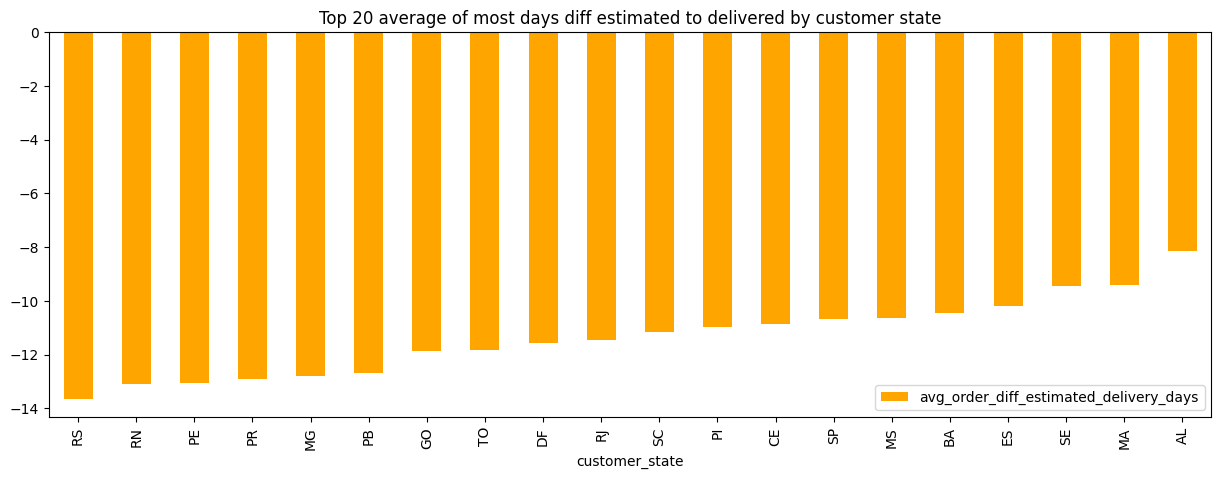

In [21]:
df_most_days_diff_estimated_to_delivered_by_customer_state.head(20).sort_values(by="avg_order_diff_estimated_delivery_days").plot.bar(
    y=["avg_order_diff_estimated_delivery_days"],
    title="Top 20 average of most days diff estimated to delivered by customer state",
    color=["orange"],
    figsize=(15, 5)
    )

**Top 20 best sales product category**

<Axes: title={'center': 'Top 7 most sales product category'}, xlabel='product_category_name_english'>

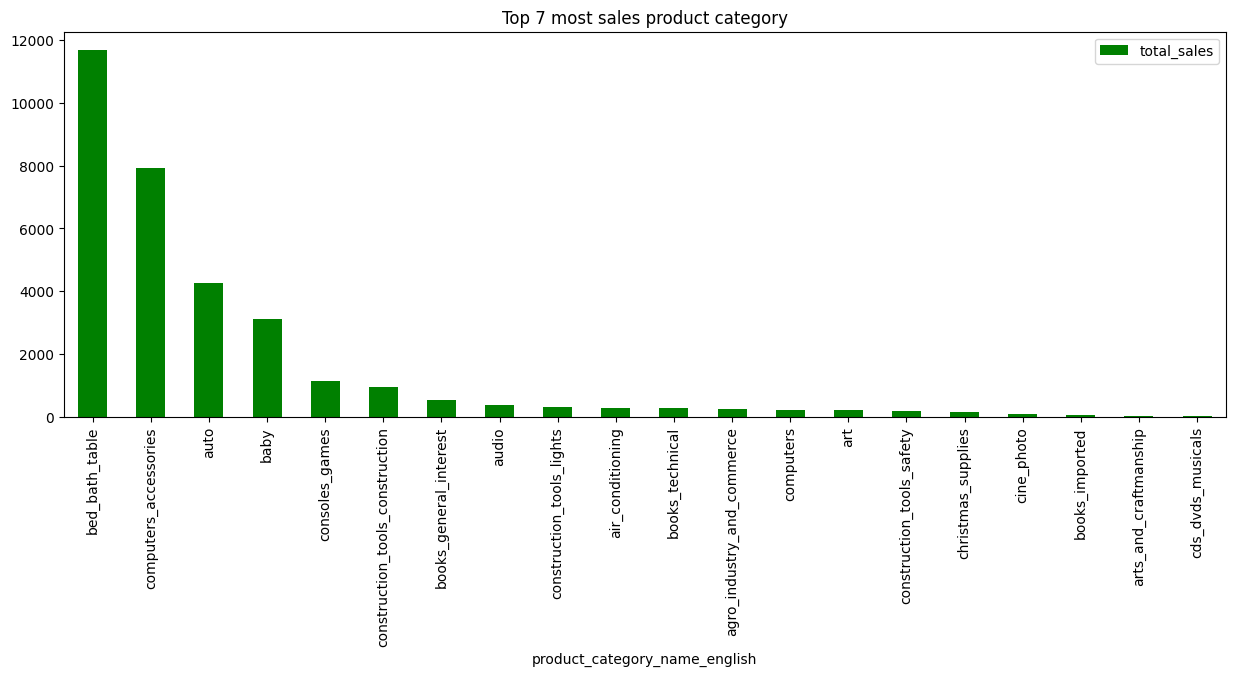

In [30]:
df_best_sales_products_categories.groupby("product_category_name_english").agg({"total_sales": "sum"}).head(20).sort_values(
    by="total_sales",
    ascending=False
    ).reset_index().plot.bar(
        x="product_category_name_english",
        y="total_sales",
        color="green",
        figsize=(15, 5),
        title="Top 20 most sales product category"
        )

**Top 20 best product cateogry score**

<Axes: title={'center': 'Top 20 most product cateogry score'}, xlabel='product_category_name_english'>

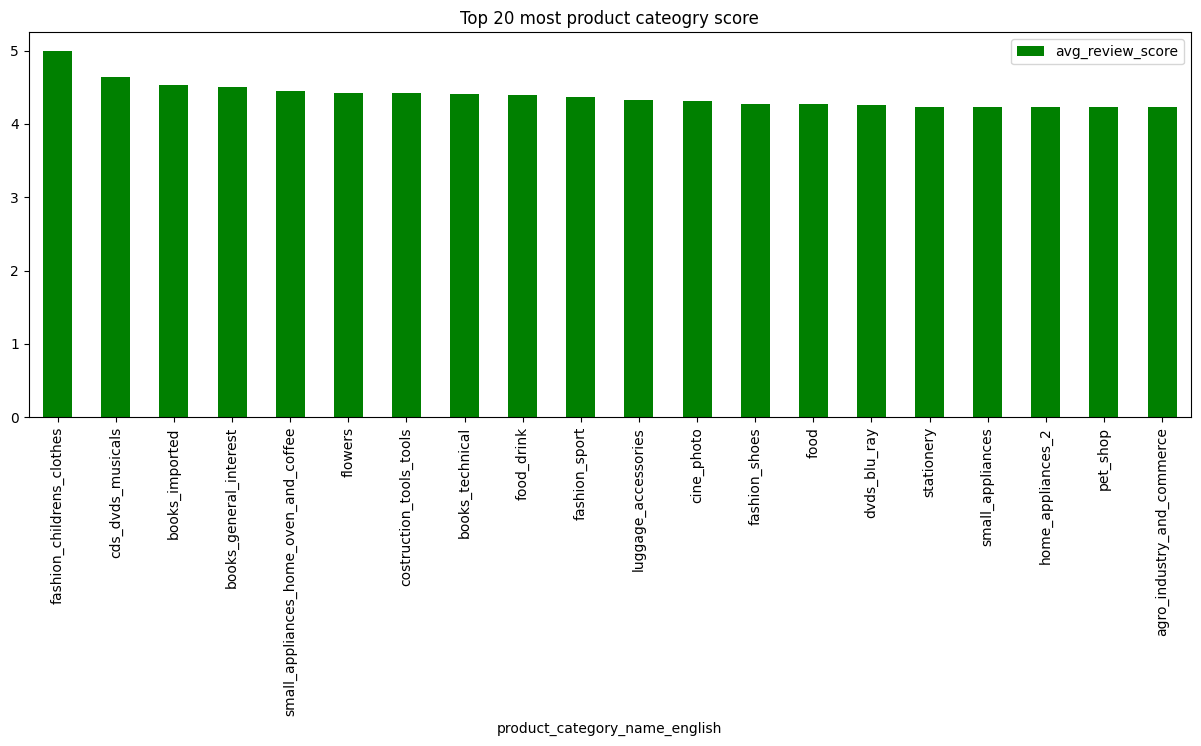

In [46]:
df_best_product_categories_score.head(20).reset_index().plot.bar(
      x="product_category_name_english",
      y="avg_review_score",
      color="green",
      title="Top 20 most product cateogry score",
      figsize=(15, 5)
)

**Top 20 worst product categories score**

<Axes: title={'center': 'Top 7 most product cateogry score'}, xlabel='product_category_name_english'>

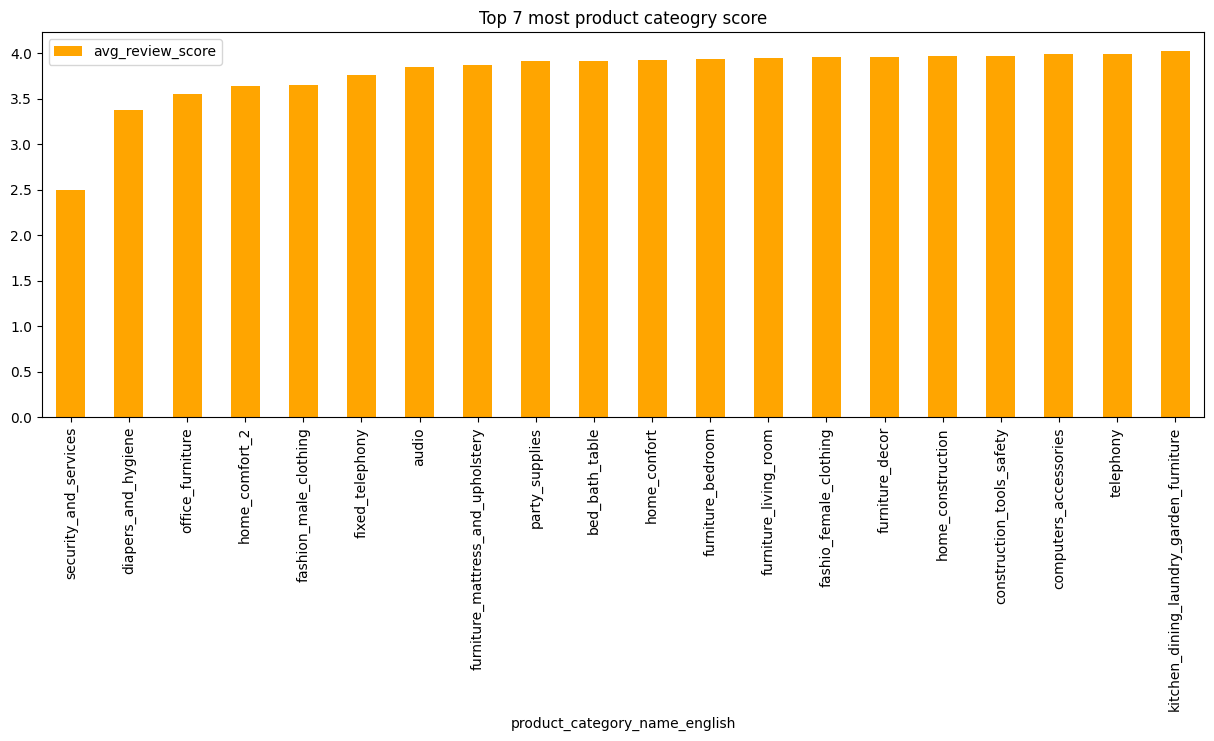

In [52]:
df_worst_product_categories_score.head(20).reset_index().plot.bar(
      x="product_category_name_english",
      y="avg_review_score",
      color="orange",
      title="Top 20 most product cateogry score",
      figsize=(15, 5)
)